# "Smart" Gesture Recognition


**Business Proposal**

Nowadays, technology has a pivotal role in creating virtual environments with virtual elements. We work collaboratively with real-world intelligent objects on a day-to-day basis. Innovations like the Internet of things (IoT) products, gesture recognition, and teleportation application have certainly made our life "smarter" and more accessible.   


Embracing an "implementing a smarter life" mindset, Team College aims to develop a cool feature in the smart TV that can recognize five different gestures performed by the user to help users control the TV without using a remote. Based on this dataset, Team College wants to develop a well-rounded deep learning gesture recognition model which has applications in a spectrum of different industries beyond smart-TV. 

**Dataset Description**
The data consists of a few hundred videos categorized into five classes: thumb up, thumb down, swipe left, swipe right, stop. The webcam mounted on the TV continuously monitors the gestures. Each motion corresponds to a specific command:    
 
| Gesture | Corresponding Action |
| --- | --- | 
| Thumbs Up | Increase the volume. |
| Thumbs Down | Decrease the volume. |
| Left Swipe | 'Jump' backwards 10 seconds. |
| Right Swipe | 'Jump' forward 10 seconds. |
| Stop | Pause the movie. |

The training data consists of 19,890 images (663*30): there are 663 videos categorized into one of the five classes. Each video (typically 2-3 seconds long) is divided into a sequence of 30 frames(images). The testing data consists of a total of 3,000 images.	  

Various people have recorded these videos performing one of the five gestures in front of a webcam - like what the smart TV will use. Specifically, videos have two types of dimensions - either 360x360 or 120x160 (depending on the webcam used to record the videos) 

### Team College Objectives:
1. **Data Preprocessing_Generator Establishment**:  Team College aim to build a function called "Generator" so that this fuction should be able to take a batch of videos as input without any error. Steps like cropping, resizing and normalization should be performed successfully.

2. **Experimentation _ Model Architecture**: Team College aim to develop the best model that is able to train with high accuracy and without any errors. To achieve the goal, Conv3D with Maxpolling 3D, RNN, CNN LSTM with GRU (for augmentation) models will be used to tackle the problem. 

3. **Best Performing Model**: Further Development and Tryouts such as Generative Adversarial Networks (GAN) , Different Batch Size, Learning Rate and tansfer learning method will be applied to design the best performing Model.

## Prerequisite

In [ ]:
# The script is for MacOS user and it depends on
# 1) Python version 3.8.8
# 2) a empty Virtual environment
# 3) a empty Kernel
# 4) requirement.txt
# please refer to the Project Setup part on readme.md

pip install -r requirements.txt

## Housekeeping Setup

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, LSTM
from keras.layers.convolutional import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from matplotlib import image

import os
from skimage.transform import resize
from imageio import imread
import datetime

import pathlib
from os.path import isfile, join

import matplotlib.pyplot as plt
import PIL
import PIL.Image
import warnings
warnings.filterwarnings('ignore')

We set the random seed as 30 to ensure the steady outcome

In [2]:
import datetime
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(30)

import torch
import torch.nn as nn

Setp for GPU check, if you have it, lucky you; ifelse, this might take some time to compute :)

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Load Data

- No. training sequences = 530
- No. validation sequences = 133
- No. testing sequences = 100

train-val-test = 70% - 17% -13%

In [69]:
train_doc_csv_path = r'Project_data/train.csv'
test_doc_csv_path = r'Project_data/test.csv'
val_doc_csv_path = r'Project_data/val.csv'

train_doc = np.random.permutation(open(train_doc_csv_path).readlines())
test_doc = np.random.permutation(open(test_doc_csv_path).readlines())
val_doc = np.random.permutation(open(val_doc_csv_path).readlines())

# It is better to place batch_size as an optional argument 
batch_size = 64

## Data EDA
Sample train and val dataset display as follow:
- train_doc contains 662 datapoints (<font color='red'>?</font>)
- test_doc contains <font color='red'>?</font> datapoints (<font color='red'>?</font>)
- val-doc contains 100 datapoints (<font color='red'>?</font>)

In [70]:
train_doc.size

530

In [71]:
import os

count = 0
for root_dir, cur_dir, files in os.walk(r'Project_data/train'):
    count += len(files)
print('file count:', count)

file count: 15901


In [72]:
train_doc

array(['WIN_20180925_17_39_25_Pro_Left_Swipe_new,Left_Swipe_new,0\n',
       'WIN_20180926_16_58_25_Pro_Stop_new,Stop_new,2\n',
       'WIN_20180926_17_53_03_Pro_Right_Swipe_new,Right_Swipe_new,1\n',
       'WIN_20180907_16_30_24_Pro_Stop Gesture_new,Stop Gesture_new,2\n',
       'WIN_20180926_17_43_07_Pro_Left_Swipe_new,Left_Swipe_new,0\n',
       'WIN_20180926_16_37_46_Pro_Stop_new,Stop_new,2\n',
       'WIN_20180926_18_07_05_Pro_Right_Swipe_new,Right_Swipe_new,1\n',
       'WIN_20180907_15_38_17_Pro_Left Swipe_new_Left Swipe_new,Left Swipe_new_Left Swipe_new,0\n',
       'WIN_20180925_17_57_31_Pro_Stop_new,Stop_new,2\n',
       'WIN_20180907_15_44_32_Pro_Thumbs Down_new,Thumbs Down_new,3\n',
       'WIN_20180907_16_35_35_Pro_Left Swipe_new_Left Swipe_new,Left Swipe_new_Left Swipe_new,0\n',
       'WIN_20180926_17_36_08_Pro_Thumbs_Down_new,Thumbs_Down_new,3\n',
       'WIN_20180926_17_20_43_Pro_Left_Swipe_new,Left_Swipe_new,0\n',
       'WIN_20180925_18_02_17_Pro_Left_Swipe_new,Left_

In [73]:
val_doc

array(['WIN_20180907_16_14_53_Pro_Stop Gesture_new,Stop Gesture_new,2\n',
       'WIN_20180907_16_37_03_Pro_Right Swipe_new,Right Swipe_new,1\n',
       'WIN_20180907_16_28_15_Pro_Stop Gesture_new,Stop Gesture_new,2\n',
       'WIN_20180925_17_52_58_Pro_Left_Swipe_new,Left_Swipe_new,0\n',
       'WIN_20180926_17_47_06_Pro_Stop_new,Stop_new,2\n',
       'WIN_20180925_18_01_30_Pro_Stop_new,Stop_new,2\n',
       'WIN_20180907_16_14_43_Pro_Thumbs Down_new,Thumbs Down_new,3\n',
       'WIN_20180926_17_10_34_Pro_Right_Swipe_new,Right_Swipe_new,1\n',
       'WIN_20180926_17_01_07_Pro_Thumbs_Up_new,Thumbs_Up_new,4\n',
       'WIN_20180925_17_44_57_Pro_Thumbs_Down_new,Thumbs_Down_new,3\n',
       'WIN_20180925_17_26_51_Pro_Left_Swipe_new,Left_Swipe_new,0\n',
       'WIN_20180907_16_11_06_Pro_Stop Gesture_new,Stop Gesture_new,2\n',
       'WIN_20180907_15_56_32_Pro_Left Swipe_new_Left Swipe_new,Left Swipe_new_Left Swipe_new,0\n',
       'WIN_20180926_17_33_51_Pro_Thumbs_Up_new,Thumbs_Up_new,4\n'

In [74]:
test_doc

array(['WIN_20180907_16_25_57_Pro_Right Swipe_new;Right Swipe_new;1\n',
       'WIN_20180926_17_33_49_Pro_Stop_new;Stop_new;2\n',
       'WIN_20180926_16_47_44_Pro_Stop_new;Stop_new;2\n',
       'WIN_20180907_16_13_24_Pro_Thumbs Down_new;Thumbs Down_new;3\n',
       'WIN_20180926_17_32_55_Pro_Left_Swipe_new;Left_Swipe_new;0\n',
       'WIN_20180907_16_09_35_Pro_Thumbs Down_new;Thumbs Down_new;3\n',
       'WIN_20180925_17_25_06_Pro_Right_Swipe_new;Right_Swipe_new;1\n',
       'WIN_20180907_15_43_36_Pro_Thumbs Up_new;Thumbs Up_new;4\n',
       'WIN_20180907_16_02_09_Pro_Thumbs Down_new;Thumbs Down_new;3\n',
       'WIN_20180926_17_40_21_Pro_Left_Swipe_new;Left_Swipe_new;0\n',
       'WIN_20180926_17_05_38_Pro_Left_Swipe_new;Left_Swipe_new;0\n',
       'WIN_20180926_16_47_09_Pro_Left_Swipe_new;Left_Swipe_new;0\n',
       'WIN_20180926_16_43_34_Pro_Thumbs_Up_new;Thumbs_Up_new;4\n',
       'WIN_20180907_15_30_06_Pro_Right Swipe_new;Right Swipe_new;1\n',
       'WIN_20180926_17_08_11_Pro_St

## Data Preprocessing 
Following steps are followed:
1. Resized the image and cropped smaller image shape at center for 120*120
2. Normalized Images
3. Built 3D and 2D filter function 
4. Established function to get batch data for preprocessing Convo3D

In [75]:
def cropResize(image, y, z):
    h, w = image.shape
    
    # if smaller image crop at center for 120x120
    if w == 160:
        image = image[:120, 20:140]

    # resize every image
    return resize(image, (y,z))

In [76]:
def normalizeImage(image):
    # applying normalization
    return image/255.0

In [77]:
def preprocessImage(image, y, z):
    return normalizeImage(cropResize(image, y, z))

In [78]:
def make3dFilter(x):
    return tuple([x]*3)

def make2dFilter(x):
    return tuple([x]*2)

### For Mac User Only

In [79]:
def getBatchData(source_path, t, batch, batch_size, img_tensor):
    [x,y,z] = [len(img_tensor[0]),img_tensor[1], img_tensor[2]]
    img_idx = img_tensor[0]
    batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
    batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
    for folder in range(batch_size): # iterate over the batch_size
        imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(',')[0]) # read all the images in the folder
        for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
            image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(',')[0]+'/'+imgs[item]).astype(np.float32)

            #crop the images and resize them. Note that the images are of 2 different shape 
            #and the conv3D will throw error if the inputs in a batch have different shapes

            # separate preprocessImage function is defined for cropping, resizing and normalizing images
            batch_data[folder,idx,:,:,0] = preprocessImage(image[:, :, 0], y, z)
            batch_data[folder,idx,:,:,1] = preprocessImage(image[:, :, 1], y, z)
            batch_data[folder,idx,:,:,2] = preprocessImage(image[:, :, 2], y, z)

        batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(',')[2])] = 1
    return batch_data, batch_labels

## Generator Establishment
Since the dataset contains 2 types of dimensions, a "generator" is build to preprocess the images for `2D` and `3D` dimensions, as well as create `a batch of video frames`. We experiment with `img_idx`, `y`,`z` and normalization such that to achieve a high accuracy outcome.

In [80]:
def generator(source_path, folder_list, batch_size, img_tensor):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    while True:
        t = np.random.permutation(folder_list)
        num_batches = int(len(folder_list)/batch_size)
        for batch in range(num_batches): # we iterate over the number of batches
            yield getBatchData(source_path, t, batch, batch_size, img_tensor)
        
        # write the code for the remaining data points which are left after full batches
        # checking if any remaining batches are there or not
        if len(folder_list)%batch_size != 0:
            # updated the batch size and yield
            batch_size = len(folder_list)%batch_size
            yield getBatchData(source_path, t, batch, batch_size, img_tensor)

Note: a video is represented above in the generator as (number of images, height, width, number of channels)

In [81]:
curr_dt_time = datetime.datetime.now()
train_path = './Project_data/train'
val_path = './Project_data/val'
test_path = './Project_data/test'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_test_sequences = len(test_doc)
print('# Test sequences =', num_test_sequences)
num_epochs = 10
print ('# epochs =', num_epochs)

# training sequences = 530
# validation sequences = 133
# Test sequences = 100
# epochs = 10


In [82]:
def getImgTensor(n_frames):
    img_idx = np.round(np.linspace(0, 29, n_frames)).astype(int)
    return [img_idx, 100, 100, 3]

# define image tensor size
img_tensor = getImgTensor(20)
print ('# img_tensor =', img_tensor)

# img_tensor = [array([ 0,  2,  3,  5,  6,  8,  9, 11, 12, 14, 15, 17, 18, 20, 21, 23, 24,
       26, 27, 29]), 100, 100, 3]


### Generator Validation

In [83]:
# check complete batch shape
sample_generator = generator(train_path, train_doc, batch_size, img_tensor)
sample_batch_data, sample_batch_labels = next(sample_generator)
print(sample_batch_data.shape)

# validation batch sample
sample_val_generator = generator(val_path, val_doc, batch_size, img_tensor)
sample_val_batch_data, sample_val_batch_labels = next(sample_val_generator)
print(sample_val_batch_data.shape)

Source path =  ./Project_data/train ; batch size = 64
(64, 20, 100, 100, 3)
Source path =  ./Project_data/val ; batch size = 64
(64, 20, 100, 100, 3)


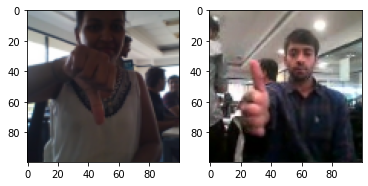

In [84]:
# plot generated sample images
fig, ax = plt.subplots(1,2)
ax[0].imshow(sample_val_batch_data[15,10,:,:,:])   
ax[1].imshow(sample_val_batch_data[5,10,:,:,:])
plt.show()

In [85]:
def plotModelHistory(h):
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    ax[0].plot(h.history['loss'])   
    ax[0].plot(h.history['val_loss'])
    ax[0].legend(['loss','val_loss'])
    ax[0].title.set_text("Train loss vs Validation loss")

    ax[1].plot(h.history['categorical_accuracy'])   
    ax[1].plot(h.history['val_categorical_accuracy'])
    ax[1].legend(['categorical_accuracy','val_categorical_accuracy'])
    ax[1].title.set_text("Train accuracy vs Validation accuracy")
    plt.show()

    print("Max. Training Accuracy", max(h.history['categorical_accuracy']))
    print("Max. Validaiton Accuracy", max(h.history['val_categorical_accuracy']))

## Model Building
Team College aim to develop the best model that is able to train with high accuracy and without any errors. To achieve the goal, following Models have been used for tryouts:

1. `Conv3D` with `MaxPooling3D` for a 3D convolution model 
2. `TimeDistributed` while building a Conv2D + RNN model
3. `CNN LSTM with GRU` for augmentation

Moreover, for each model, we set the last layer is the softmax so that the least number of parameters can fit in the memory of the webcam. Hence to perform a good accuracy on the least number of parameters.

In [86]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout, LSTM
from keras.layers.convolutional import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,CSVLogger,LearningRateScheduler
from keras import optimizers

### Base Model

In [87]:
#write your model here
def defineModel(img_tensor):
    
    opt = tf.keras.optimizers.Adam()
    
    inputShape = (len(img_tensor[0]), img_tensor[1], img_tensor[2], img_tensor[3])

    model = Sequential([
        Conv3D(16, make3dFilter(5), activation='relu', input_shape=inputShape),
        MaxPooling3D(make3dFilter(2), padding='same'),
        BatchNormalization(),

        Conv3D(32, make3dFilter(3), activation='relu'),
        MaxPooling3D(pool_size=(1,2,2), padding='same'),
        BatchNormalization(),

        Conv3D(64, make3dFilter(3), activation='relu'),
        MaxPooling3D(pool_size=(1,2,2), padding='same'),
        BatchNormalization(),

        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),

        Dense(5, activation='softmax')
    ])
    model.compile(opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

model = defineModel(img_tensor)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 16, 96, 96, 16)    6016      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 8, 48, 48, 16)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 8, 48, 48, 16)    64        
 ormalization)                                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 6, 46, 46, 32)     13856     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 6, 23, 23, 32)    0         
 3D)                                                             
                                                        

2022-03-17 14:55:55.766032: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [88]:
#write your model here
def defineModel(img_tensor):
    inputShape = (len(img_tensor[0]), img_tensor[1], img_tensor[2], img_tensor[3])
    
    opt = tf.keras.optimizers.Adam()

    model = Sequential([
        Conv3D(16, make3dFilter(5), activation='relu', input_shape=inputShape),
        MaxPooling3D(make3dFilter(2), padding='same'),
        BatchNormalization(),

        Conv3D(32, make3dFilter(3), activation='relu'),
        MaxPooling3D(pool_size=(1,2,2), padding='same'),
        BatchNormalization(),

        Conv3D(64, make3dFilter(3), activation='relu'),
        MaxPooling3D(pool_size=(1,2,2), padding='same'),
        BatchNormalization(),

        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),

        Dense(5, activation='softmax')
    ])
    model.compile(opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model

model = defineModel(img_tensor)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 16, 96, 96, 16)    6016      
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 8, 48, 48, 16)    0         
 3D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 8, 48, 48, 16)    64        
 hNormalization)                                                 
                                                                 
 conv3d_4 (Conv3D)           (None, 6, 46, 46, 32)     13856     
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 6, 23, 23, 32)    0         
 3D)                                                             
                                                      

In [89]:
train_generator = generator(train_path, train_doc, batch_size, img_tensor)
val_generator = generator(val_path, val_doc, batch_size, img_tensor)

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [90]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

### Model Callbacks Setup _ CheckPoint, Earlystop & Tensorboard Callbacks

In [91]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)

filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}.h5'


checkpoint = ModelCheckpoint(
    filepath,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    save_freq=1,
    mode='auto', 
    save_fre='epoch'
)
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=4,
    verbose=1,
    #min_delta=0,
    mode='auto'
)
tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
    embeddings_freq=0
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks_list = [checkpoint,tensorboard,csvlogger,reduce]

### Test Batch Size & Frames

In [92]:
def testBatchSize(batch_size, n_frames):
    img_tensor = getImgTensor(n_frames)
    print("Using frames as", img_tensor[0])
    global callbacks_list
    num_epochs = 3
    train_generator = generator(train_path, train_doc, batch_size, img_tensor)
    val_generator = generator(val_path, val_doc, batch_size, img_tensor)
    if (num_train_sequences%batch_size) == 0:
        steps_per_epoch = int(num_train_sequences/batch_size)
    else:
        steps_per_epoch = (num_train_sequences//batch_size) + 1

    if (num_val_sequences%batch_size) == 0:
        validation_steps = int(num_val_sequences/batch_size)
    else:
        validation_steps = (num_val_sequences//batch_size) + 1

    model = defineModel(img_tensor)
    model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                callbacks=callbacks_list, validation_data=val_generator, 
                validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [93]:
#testBatchSize(batch_size=64, n_frames=30)

In [96]:
testBatchSize(batch_size=64, n_frames=16)

Using frames as [ 0  2  4  6  8 10 12 14 15 17 19 21 23 25 27 29]
Source path =  ./Project_data/train ; batch size = 64
Epoch 1/3
9/9 [==============================] - 142s 16s/step - loss: 1.5580 - categorical_accuracy: 0.4340 - val_loss: 3.9368 - val_categorical_accuracy: 0.2481 - lr: 0.0010
Epoch 2/3
9/9 [==============================] - 37s 4s/step - loss: 1.1392 - categorical_accuracy: 0.6049 - val_loss: 3.2205 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 3/3
9/9 [==============================] - 38s 4s/step - loss: 1.2642 - categorical_accuracy: 0.5432 - val_loss: 3.7837 - val_categorical_accuracy: 0.1333 - lr: 0.0010


In [94]:
#testBatchSize(batch_size=32, n_frames=30)

In [95]:
#testBatchSize(batch_size=32, n_frames=16)

With above observations, we can see that batch size is not impacting training time but number of frames. We will use **batch size of 64 and frame of 16** as it seems optimal. It is commented as it takes a lot of time to run that is restricting for the notebook to completely run.

### Model 1.0 - Frames-30, Epoc-20, relu

In [97]:
n_frames = 16
num_epochs = 20
batch_size = 64

img_tensor = getImgTensor(n_frames)
train_generator = generator(train_path, train_doc, batch_size, img_tensor)
val_generator = generator(val_path, val_doc, batch_size, img_tensor)

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
inputShape = (len(img_tensor[0]), img_tensor[1], img_tensor[2], img_tensor[3])

model1 = Sequential([
    Conv3D(16, make3dFilter(5), activation='relu', input_shape=inputShape),
    MaxPooling3D(make3dFilter(2), padding='same'),
    BatchNormalization(),

    Conv3D(32, make3dFilter(3), activation='relu'),
    MaxPooling3D(pool_size=(1,2,2), padding='same'),
    BatchNormalization(),

    Conv3D(64, make3dFilter(3), activation='relu'),
    MaxPooling3D(pool_size=(1,2,2), padding='same'),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(5, activation='softmax')
], name="conv_3d1")
model1.compile(optimizer= tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model1.summary())

model1_history = model1.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
            callbacks=callbacks_list, validation_data=val_generator, 
            validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Model: "conv_3d1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_9 (Conv3D)           (None, 12, 96, 96, 16)    6016      
                                                                 
 max_pooling3d_9 (MaxPooling  (None, 6, 48, 48, 16)    0         
 3D)                                                             
                                                                 
 batch_normalization_15 (Bat  (None, 6, 48, 48, 16)    64        
 chNormalization)                                                
                                                                 
 conv3d_10 (Conv3D)          (None, 4, 46, 46, 32)     13856     
                                                                 
 max_pooling3d_10 (MaxPoolin  (None, 4, 23, 23, 32)    0         
 g3D)                                                            
                                                          

9/9 [==============================] - 19s 2s/step - loss: 0.7616 - categorical_accuracy: 0.7222 - val_loss: 5.9135 - val_categorical_accuracy: 0.1818 - lr: 1.0000e-04
Epoch 9/20
9/9 [==============================] - 19s 2s/step - loss: 0.9648 - categorical_accuracy: 0.6250 - val_loss: 4.2200 - val_categorical_accuracy: 0.1111 - lr: 1.0000e-04
Epoch 10/20
9/9 [==============================] - 18s 2s/step - loss: 0.7383 - categorical_accuracy: 0.7778 - val_loss: 2.2188 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 11/20
9/9 [==============================] - 17s 2s/step - loss: 0.9998 - categorical_accuracy: 0.5278 - val_loss: 1.5917 - val_categorical_accuracy: 0.5556 - lr: 1.0000e-04
Epoch 12/20
9/9 [==============================] - 14s 2s/step - loss: 0.9078 - categorical_accuracy: 0.6296 - val_loss: 2.8019 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 13/20
9/9 [==============================] - 7s 848ms/step - loss: 1.8888 - categorical_accuracy: 0.2778 - 

9/9 [==============================] - 8s 920ms/step - loss: 1.9107 - categorical_accuracy: 0.3333 - val_loss: 2.6462 - val_categorical_accuracy: 0.4444 - lr: 1.0000e-06
Epoch 19/20
9/9 [==============================] - 6s 743ms/step - loss: 1.4642 - categorical_accuracy: 0.3889 - val_loss: 2.3977 - val_categorical_accuracy: 0.2857 - lr: 1.0000e-06
Epoch 20/20
9/9 [==============================] - ETA: 0s - loss: 1.6468 - categorical_accuracy: 0.4444
Epoch 00020: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
9/9 [==============================] - 6s 703ms/step - loss: 1.6468 - categorical_accuracy: 0.4444 - val_loss: 3.3797 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-06


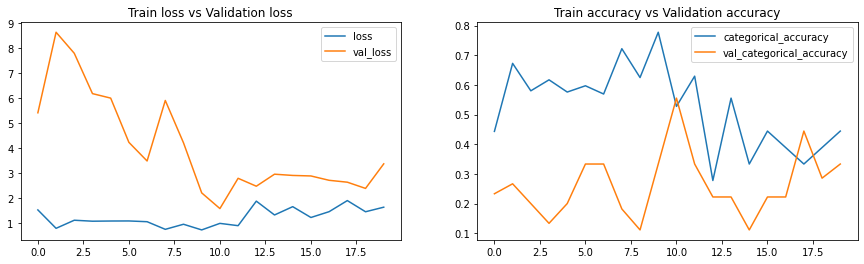

Max. Training Accuracy 0.7777777910232544
Max. Validaiton Accuracy 0.5555555820465088


In [98]:
plotModelHistory(model1_history)

### Model 1.1 - Frames-32, Epoc-20, elu

In [99]:
n_frames = 16
num_epochs = 20
batch_size = 64

img_tensor = getImgTensor(n_frames)
train_generator = generator(train_path, train_doc, batch_size, img_tensor)
val_generator = generator(val_path, val_doc, batch_size, img_tensor)

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
inputShape = (len(img_tensor[0]), img_tensor[1], img_tensor[2], img_tensor[3])

model2 = Sequential([
    Conv3D(16, make3dFilter(5), activation='elu', input_shape=inputShape),
    MaxPooling3D(make3dFilter(2), padding='same'),
    BatchNormalization(),

    Conv3D(32, make3dFilter(3), activation='elu'),
    MaxPooling3D(pool_size=(1,2,2), padding='same'),
    BatchNormalization(),

    Conv3D(64, make3dFilter(3), activation='elu'),
    MaxPooling3D(pool_size=(1,2,2), padding='same'),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='elu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(64, activation='elu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(5, activation='softmax')
], name="conv_3d1")
model2.compile(optimizer= tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model2.summary())

model2_history = model2.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
            callbacks=callbacks_list, validation_data=val_generator, 
            validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Model: "conv_3d1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_12 (Conv3D)          (None, 12, 96, 96, 16)    6016      
                                                                 
 max_pooling3d_12 (MaxPoolin  (None, 6, 48, 48, 16)    0         
 g3D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 6, 48, 48, 16)    64        
 chNormalization)                                                
                                                                 
 conv3d_13 (Conv3D)          (None, 4, 46, 46, 32)     13856     
                                                                 
 max_pooling3d_13 (MaxPoolin  (None, 4, 23, 23, 32)    0         
 g3D)                                                            
                                                          

9/9 [==============================] - 17s 2s/step - loss: 0.8314 - categorical_accuracy: 0.6806 - val_loss: 5.5788 - val_categorical_accuracy: 0.2727 - lr: 1.0000e-04
Epoch 9/20
9/9 [==============================] - ETA: 0s - loss: 0.6349 - categorical_accuracy: 0.7639
Epoch 00009: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
9/9 [==============================] - 17s 2s/step - loss: 0.6349 - categorical_accuracy: 0.7639 - val_loss: 4.0951 - val_categorical_accuracy: 0.2222 - lr: 1.0000e-04
Epoch 10/20
9/9 [==============================] - 17s 2s/step - loss: 1.0490 - categorical_accuracy: 0.5694 - val_loss: 3.0640 - val_categorical_accuracy: 0.2222 - lr: 1.0000e-05
Epoch 11/20
9/9 [==============================] - 18s 2s/step - loss: 0.9167 - categorical_accuracy: 0.6528 - val_loss: 4.2778 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-05
Epoch 12/20
9/9 [==============================] - 14s 2s/step - loss: 0.9299 - categorical_accuracy: 0.7222 - val_loss

9/9 [==============================] - 7s 782ms/step - loss: 1.2980 - categorical_accuracy: 0.6111 - val_loss: 2.4250 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-05
Epoch 19/20
9/9 [==============================] - ETA: 0s - loss: 0.8399 - categorical_accuracy: 0.6667
Epoch 00019: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
9/9 [==============================] - 6s 685ms/step - loss: 0.8399 - categorical_accuracy: 0.6667 - val_loss: 1.7610 - val_categorical_accuracy: 0.4286 - lr: 1.0000e-05
Epoch 20/20
9/9 [==============================] - 5s 622ms/step - loss: 1.4864 - categorical_accuracy: 0.4444 - val_loss: 1.5982 - val_categorical_accuracy: 0.6667 - lr: 1.0000e-06


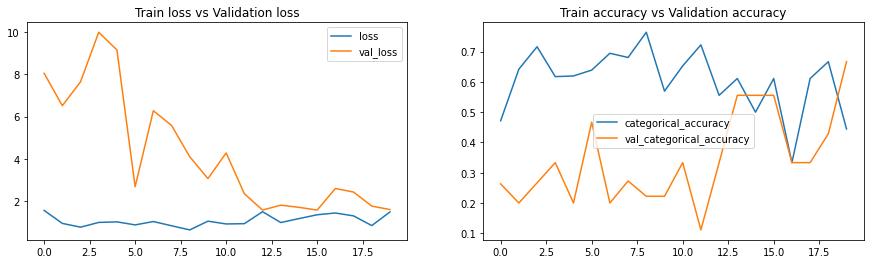

Max. Training Accuracy 0.7638888955116272
Max. Validaiton Accuracy 0.6666666865348816


In [100]:
plotModelHistory(model2_history)

### Model 2.0: Frames:16, Epocs-20, BS-64, relu >>> reduced kernel to (2,2,2), switching BatchNormalization before MaxPooling

In [102]:
n_frames = 20
num_epochs = 20
batch_size = 64

img_tensor = getImgTensor(n_frames)
train_generator = generator(train_path, train_doc, batch_size, img_tensor)
val_generator = generator(val_path, val_doc, batch_size, img_tensor)

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
inputShape = (len(img_tensor[0]), img_tensor[1], img_tensor[2], img_tensor[3])

model3 = Sequential([
    Conv3D(16, make3dFilter(2), padding='same', activation='relu', input_shape=inputShape),
    BatchNormalization(),
    MaxPooling3D(make3dFilter(2)),

    Conv3D(32, make3dFilter(2), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2)),

    Conv3D(64, make3dFilter(2), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2)),

    Conv3D(128, make3dFilter(2), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2)),

    Flatten(),
    Dense(256, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.3),

    Dense(128, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.2),

    Dense(5, activation='softmax')
], name="conv_3d5")
model3.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model3.summary())

model3_history = model3.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
            callbacks=callbacks_list, validation_data=val_generator, 
            validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Model: "conv_3d5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_19 (Conv3D)          (None, 20, 100, 100, 16)  400       
                                                                 
 batch_normalization_29 (Bat  (None, 20, 100, 100, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_19 (MaxPoolin  (None, 10, 50, 50, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_20 (Conv3D)          (None, 10, 50, 50, 32)    4128      
                                                                 
 batch_normalization_30 (Bat  (None, 10, 50, 50, 32)   128       
 chNormalization)                                                
                                                          

9/9 [==============================] - 37s 4s/step - loss: 1.0015 - categorical_accuracy: 0.6358 - val_loss: 4.8789 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 5/20
9/9 [==============================] - ETA: 0s - loss: 0.9888 - categorical_accuracy: 0.6630
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
9/9 [==============================] - 22s 2s/step - loss: 0.9888 - categorical_accuracy: 0.6630 - val_loss: 6.1640 - val_categorical_accuracy: 0.1333 - lr: 0.0010
Epoch 6/20
9/9 [==============================] - 21s 3s/step - loss: 0.6478 - categorical_accuracy: 0.7778 - val_loss: 7.5072 - val_categorical_accuracy: 0.2667 - lr: 1.0000e-04
Epoch 7/20
9/9 [==============================] - 18s 2s/step - loss: 0.4136 - categorical_accuracy: 0.8194 - val_loss: 8.2395 - val_categorical_accuracy: 0.1333 - lr: 1.0000e-04
Epoch 8/20
9/9 [==============================] - ETA: 0s - loss: 0.6618 - categorical_accuracy: 0.8194
Epoch 00008: ReduceLROnPl

Epoch 9/20
9/9 [==============================] - 16s 2s/step - loss: 0.4826 - categorical_accuracy: 0.8056 - val_loss: 10.9665 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-05
Epoch 10/20
9/9 [==============================] - 16s 2s/step - loss: 0.4735 - categorical_accuracy: 0.7917 - val_loss: 13.9437 - val_categorical_accuracy: 0.0000e+00 - lr: 1.0000e-05
Epoch 11/20
9/9 [==============================] - ETA: 0s - loss: 0.4735 - categorical_accuracy: 0.8333
Epoch 00011: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
9/9 [==============================] - 15s 2s/step - loss: 0.4735 - categorical_accuracy: 0.8333 - val_loss: 12.7259 - val_categorical_accuracy: 0.1111 - lr: 1.0000e-05
Epoch 12/20
9/9 [==============================] - 13s 2s/step - loss: 0.5023 - categorical_accuracy: 0.7778 - val_loss: 8.2952 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-06
Epoch 13/20
8/9 [=========================>....] - ETA: 0s - loss: 0.4274 - categorical_accuracy: 0.

9/9 [==============================] - 6s 721ms/step - loss: 0.4095 - categorical_accuracy: 0.8333 - val_loss: 14.6001 - val_categorical_accuracy: 0.1111 - lr: 1.0000e-06
Epoch 14/20
9/9 [==============================] - ETA: 0s - loss: 0.4544 - categorical_accuracy: 0.7778
Epoch 00014: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
9/9 [==============================] - 8s 903ms/step - loss: 0.4544 - categorical_accuracy: 0.7778 - val_loss: 12.8289 - val_categorical_accuracy: 0.1111 - lr: 1.0000e-06
Epoch 15/20
9/9 [==============================] - 6s 682ms/step - loss: 0.3677 - categorical_accuracy: 0.8333 - val_loss: 16.9400 - val_categorical_accuracy: 0.2222 - lr: 1.0000e-07
Epoch 16/20
9/9 [==============================] - 7s 812ms/step - loss: 0.6547 - categorical_accuracy: 0.8889 - val_loss: 12.9993 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-07
Epoch 17/20
9/9 [==============================] - ETA: 0s - loss: 0.6400 - categorical_accuracy: 0.6667
E

9/9 [==============================] - 8s 997ms/step - loss: 0.4141 - categorical_accuracy: 0.8333 - val_loss: 11.4102 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-08
Epoch 19/20
9/9 [==============================] - 7s 810ms/step - loss: 0.4980 - categorical_accuracy: 0.8333 - val_loss: 8.4817 - val_categorical_accuracy: 0.4286 - lr: 1.0000e-08
Epoch 20/20
9/9 [==============================] - ETA: 0s - loss: 0.3198 - categorical_accuracy: 0.9444
Epoch 00020: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
9/9 [==============================] - 5s 574ms/step - loss: 0.3198 - categorical_accuracy: 0.9444 - val_loss: 19.7486 - val_categorical_accuracy: 0.0000e+00 - lr: 1.0000e-08


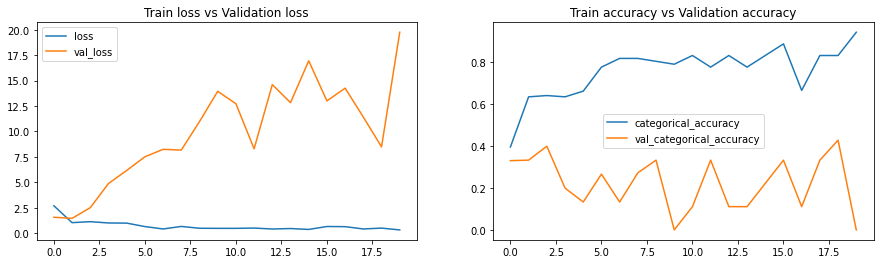

Max. Training Accuracy 0.9444444179534912
Max. Validaiton Accuracy 0.4285714328289032


In [103]:
plotModelHistory(model3_history)

### Model 2.1: Frames:16, Epocs-20, BS-64, elu >>> reduced kernel to (2,2,2), switching BatchNormalization before MaxPooling

In [105]:
n_frames = 20
num_epochs = 20
batch_size = 64

img_tensor = getImgTensor(n_frames)
train_generator = generator(train_path, train_doc, batch_size, img_tensor)
val_generator = generator(val_path, val_doc, batch_size, img_tensor)

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
inputShape = (len(img_tensor[0]), img_tensor[1], img_tensor[2], img_tensor[3])

model4 = Sequential([
    Conv3D(16, make3dFilter(2), padding='same', activation='elu', input_shape=inputShape),
    BatchNormalization(),
    MaxPooling3D(make3dFilter(2)),

    Conv3D(32, make3dFilter(2), padding='same', activation='elu'),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2)),

    Conv3D(64, make3dFilter(2), padding='same', activation='elu'),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2)),

    Conv3D(128, make3dFilter(2), padding='same', activation='elu'),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2)),

    Flatten(),
    Dense(256, activation='elu'),
    # BatchNormalization(),
    # Dropout(0.3),

    Dense(128, activation='elu'),
    # BatchNormalization(),
    # Dropout(0.2),

    Dense(5, activation='softmax')
], name="conv_3d5")
model4.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model4.summary())

model4_history = model4.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
            callbacks=callbacks_list, validation_data=val_generator, 
            validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Model: "conv_3d5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_27 (Conv3D)          (None, 20, 100, 100, 16)  400       
                                                                 
 batch_normalization_37 (Bat  (None, 20, 100, 100, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_27 (MaxPoolin  (None, 10, 50, 50, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_28 (Conv3D)          (None, 10, 50, 50, 32)    4128      
                                                                 
 batch_normalization_38 (Bat  (None, 10, 50, 50, 32)   128       
 chNormalization)                                                
                                                          

9/9 [==============================] - 49s 6s/step - loss: 1.3008 - categorical_accuracy: 0.5494 - val_loss: 2.8171 - val_categorical_accuracy: 0.2667 - lr: 0.0010
Epoch 5/20
9/9 [==============================] - ETA: 0s - loss: 0.9733 - categorical_accuracy: 0.6087
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
9/9 [==============================] - 27s 3s/step - loss: 0.9733 - categorical_accuracy: 0.6087 - val_loss: 1.8608 - val_categorical_accuracy: 0.3333 - lr: 0.0010
Epoch 6/20
9/9 [==============================] - 26s 3s/step - loss: 0.8390 - categorical_accuracy: 0.6806 - val_loss: 2.6745 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 7/20
9/9 [==============================] - 25s 3s/step - loss: 0.8613 - categorical_accuracy: 0.6389 - val_loss: 3.2963 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 8/20
9/9 [==============================] - ETA: 0s - loss: 0.6841 - categorical_accuracy: 0.7639
Epoch 00008: ReduceLROnPl

Epoch 9/20
9/9 [==============================] - 26s 3s/step - loss: 0.9758 - categorical_accuracy: 0.5833 - val_loss: 4.9224 - val_categorical_accuracy: 0.2222 - lr: 1.0000e-05
Epoch 10/20
9/9 [==============================] - 22s 2s/step - loss: 0.9214 - categorical_accuracy: 0.6250 - val_loss: 4.6214 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-05
Epoch 11/20
9/9 [==============================] - ETA: 0s - loss: 0.7880 - categorical_accuracy: 0.7083
Epoch 00011: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
9/9 [==============================] - 25s 3s/step - loss: 0.7880 - categorical_accuracy: 0.7083 - val_loss: 4.0827 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-05
Epoch 12/20
9/9 [==============================] - 20s 2s/step - loss: 0.9265 - categorical_accuracy: 0.6296 - val_loss: 1.5356 - val_categorical_accuracy: 0.2222 - lr: 1.0000e-06
Epoch 13/20
8/9 [=========================>....] - ETA: 0s - loss: 0.6390 - categorical_accuracy: 0.7500WAR

9/9 [==============================] - 8s 942ms/step - loss: 0.6044 - categorical_accuracy: 0.7778 - val_loss: 1.8237 - val_categorical_accuracy: 0.5556 - lr: 1.0000e-06
Epoch 14/20
9/9 [==============================] - 9s 1s/step - loss: 0.9326 - categorical_accuracy: 0.6111 - val_loss: 4.6416 - val_categorical_accuracy: 0.1111 - lr: 1.0000e-06
Epoch 15/20
9/9 [==============================] - ETA: 0s - loss: 0.9853 - categorical_accuracy: 0.6111
Epoch 00015: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
9/9 [==============================] - 8s 963ms/step - loss: 0.9853 - categorical_accuracy: 0.6111 - val_loss: 6.3674 - val_categorical_accuracy: 0.0000e+00 - lr: 1.0000e-06
Epoch 16/20
9/9 [==============================] - 10s 1s/step - loss: 1.0911 - categorical_accuracy: 0.5556 - val_loss: 5.1469 - val_categorical_accuracy: 0.1111 - lr: 1.0000e-07
Epoch 17/20
9/9 [==============================] - 7s 836ms/step - loss: 0.9213 - categorical_accuracy: 0.6667 

9/9 [==============================] - ETA: 0s - loss: 0.6654 - categorical_accuracy: 0.8333
Epoch 00018: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
9/9 [==============================] - 9s 1s/step - loss: 0.6654 - categorical_accuracy: 0.8333 - val_loss: 2.7743 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-07
Epoch 19/20
9/9 [==============================] - 7s 850ms/step - loss: 1.2993 - categorical_accuracy: 0.4444 - val_loss: 4.5128 - val_categorical_accuracy: 0.0000e+00 - lr: 1.0000e-08
Epoch 20/20
9/9 [==============================] - 6s 656ms/step - loss: 1.5085 - categorical_accuracy: 0.5000 - val_loss: 5.0727 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-08


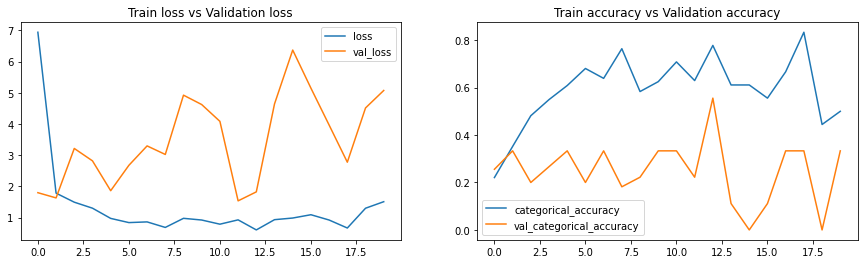

Max. Training Accuracy 0.8333333134651184
Max. Validaiton Accuracy 0.5555555820465088


In [106]:
plotModelHistory(model4_history)

### Model 3.0: Conv2D + LSTM, with relu

In [109]:
n_frames = 20
num_epochs = 30
batch_size = 32

img_tensor = getImgTensor(n_frames)
train_generator = generator(train_path, train_doc, batch_size, img_tensor)
val_generator = generator(val_path, val_doc, batch_size, img_tensor)

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
inputShape = (len(img_tensor[0]), img_tensor[1], img_tensor[2], img_tensor[3])

model5 = Sequential([
    TimeDistributed(Conv2D(16, make2dFilter(3), padding='same', activation='relu'), input_shape=inputShape),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(make2dFilter(2))),

    TimeDistributed(Conv2D(32, make2dFilter(3), padding='same', activation='relu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(make2dFilter(2))),

    TimeDistributed(Conv2D(64, make2dFilter(3), padding='same', activation='relu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(make2dFilter(2))),

    TimeDistributed(Conv2D(128, make2dFilter(3), padding='same', activation='relu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(make2dFilter(2))),

    TimeDistributed(Conv2D(256, make2dFilter(3), padding='same', activation='relu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(make2dFilter(2))),

    TimeDistributed(Flatten()),
    LSTM(256),
    Dropout(0.2),

    Dense(256, activation='relu'),
    Dropout(0.2),

    Dense(5, activation='softmax')
], name="conv_2d_lstm")
model5.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model5.summary())

model5_history = model5.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
            callbacks=callbacks_list, validation_data=val_generator, 
            validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Model: "conv_2d_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeDi  (None, 20, 100, 100, 16)  448      
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 20, 100, 100, 16)  64       
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 20, 50, 50, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, 20, 50, 50, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_20 (TimeDi  (None, 20, 50, 50, 32)  

17/17 [==============================] - 91s 6s/step - loss: 1.0066 - categorical_accuracy: 0.5817 - val_loss: 1.6655 - val_categorical_accuracy: 0.2400 - lr: 0.0010
Epoch 3/30
17/17 [==============================] - 85s 5s/step - loss: 1.0086 - categorical_accuracy: 0.5977 - val_loss: 2.9717 - val_categorical_accuracy: 0.1200 - lr: 0.0010
Epoch 4/30
15/17 [=========================>....] - ETA: 4s - loss: 1.1310 - categorical_accuracy: 0.5167WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - ETA: 0s - loss: 1.1489 - categorical_accuracy: 0.5074
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
17/17 [==============================] - 44s 3s/step - loss: 1.1489 - categorical_accuracy: 0.5074 - val_loss: 1.8742 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 5/30
17/17 [==============================] - 51s 3s/step - loss: 0.9903 - categorical_accuracy: 0.5735 - val_loss: 2.5688 - val_categorical_accuracy: 0.1200 - lr: 1.0000e-04
Epoch 6/30
17/17 [==============================] - 45s 3s/step - loss: 1.0514 - categorical_accuracy: 0.5735 - val_loss: 2.2863 - val_categorical_accuracy: 0.1765 - lr: 1.0000e-04
Epoch 7/30
 9/17 [==============>...............] - ETA: 17s - loss: 1.1398 - categorical_accuracy: 0.4861WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - ETA: 0s - loss: 1.1418 - categorical_accuracy: 0.5200
Epoch 00007: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
17/17 [==============================] - 31s 2s/step - loss: 1.1418 - categorical_accuracy: 0.5200 - val_loss: 2.7399 - val_categorical_accuracy: 0.1333 - lr: 1.0000e-04
Epoch 8/30
17/17 [==============================] - 14s 833ms/step - loss: 1.1678 - categorical_accuracy: 0.4412 - val_loss: 1.5566 - val_categorical_accuracy: 0.5333 - lr: 1.0000e-05
Epoch 9/30
17/17 [==============================] - 16s 980ms/step - loss: 1.3037 - categorical_accuracy: 0.4412 - val_loss: 2.6645 - val_categorical_accuracy: 0.2667 - lr: 1.0000e-05
Epoch 10/30
 3/17 [====>.........................] - ETA: 4s - loss: 1.1978 - categorical_accuracy: 0.5000WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 14s 826ms/step - loss: 0.8679 - categorical_accuracy: 0.6765 - val_loss: 3.0238 - val_categorical_accuracy: 0.1333 - lr: 1.0000e-05
Epoch 11/30
17/17 [==============================] - ETA: 0s - loss: 1.0204 - categorical_accuracy: 0.6471
Epoch 00011: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
17/17 [==============================] - 15s 894ms/step - loss: 1.0204 - categorical_accuracy: 0.6471 - val_loss: 2.6399 - val_categorical_accuracy: 0.1333 - lr: 1.0000e-05
Epoch 12/30
14/17 [=======================>......] - ETA: 2s - loss: 1.0412 - categorical_accuracy: 0.5714WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 15s 912ms/step - loss: 1.0840 - categorical_accuracy: 0.5588 - val_loss: 2.5966 - val_categorical_accuracy: 0.2667 - lr: 1.0000e-06
Epoch 13/30
17/17 [==============================] - 14s 835ms/step - loss: 0.9685 - categorical_accuracy: 0.5588 - val_loss: 2.2143 - val_categorical_accuracy: 0.3077 - lr: 1.0000e-06
Epoch 14/30
17/17 [==============================] - ETA: 0s - loss: 0.9353 - categorical_accuracy: 0.6176
Epoch 00014: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
17/17 [==============================] - 13s 821ms/step - loss: 0.9353 - categorical_accuracy: 0.6176 - val_loss: 2.7711 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-06
Epoch 15/30
 8/17 [=============>................] - ETA: 4s - loss: 0.9393 - categorical_accuracy: 0.6875WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 10s 621ms/step - loss: 0.9130 - categorical_accuracy: 0.6471 - val_loss: 3.0184 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-07
Epoch 16/30
17/17 [==============================] - 13s 773ms/step - loss: 0.9036 - categorical_accuracy: 0.7059 - val_loss: 2.2487 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-07
Epoch 17/30
17/17 [==============================] - 12s 724ms/step - loss: 1.0828 - categorical_accuracy: 0.5000 - val_loss: 1.4580 - val_categorical_accuracy: 0.6000 - lr: 1.0000e-07
Epoch 18/30
 3/17 [====>.........................] - ETA: 7s - loss: 1.3032 - categorical_accuracy: 0.5000WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 12s 749ms/step - loss: 1.3466 - categorical_accuracy: 0.5588 - val_loss: 2.3542 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-07
Epoch 19/30
17/17 [==============================] - 15s 944ms/step - loss: 1.1754 - categorical_accuracy: 0.5294 - val_loss: 2.1748 - val_categorical_accuracy: 0.0000e+00 - lr: 1.0000e-07
Epoch 20/30
15/17 [=========================>....] - ETA: 1s - loss: 1.2159 - categorical_accuracy: 0.4667WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - ETA: 0s - loss: 1.1354 - categorical_accuracy: 0.5000
Epoch 00020: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
17/17 [==============================] - 12s 756ms/step - loss: 1.1354 - categorical_accuracy: 0.5000 - val_loss: 4.5135 - val_categorical_accuracy: 0.0000e+00 - lr: 1.0000e-07
Epoch 21/30
17/17 [==============================] - 13s 787ms/step - loss: 1.1028 - categorical_accuracy: 0.5588 - val_loss: 2.1971 - val_categorical_accuracy: 0.4000 - lr: 1.0000e-08
Epoch 22/30
17/17 [==============================] - 12s 727ms/step - loss: 1.0407 - categorical_accuracy: 0.6765 - val_loss: 2.9430 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-08
Epoch 23/30
 9/17 [==============>...............] - ETA: 5s - loss: 1.1709 - categorical_accuracy: 0.5556WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - ETA: 0s - loss: 1.1063 - categorical_accuracy: 0.5882
Epoch 00023: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
17/17 [==============================] - 13s 768ms/step - loss: 1.1063 - categorical_accuracy: 0.5882 - val_loss: 2.5282 - val_categorical_accuracy: 0.4000 - lr: 1.0000e-08
Epoch 24/30
17/17 [==============================] - 11s 649ms/step - loss: 1.0125 - categorical_accuracy: 0.6471 - val_loss: 1.7631 - val_categorical_accuracy: 0.4000 - lr: 1.0000e-09
Epoch 25/30
17/17 [==============================] - 11s 645ms/step - loss: 0.9437 - categorical_accuracy: 0.6176 - val_loss: 2.1883 - val_categorical_accuracy: 0.4000 - lr: 1.0000e-09
Epoch 26/30
 3/17 [====>.........................] - ETA: 10s - loss: 1.1073 - categorical_accuracy: 0.6667WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 12s 722ms/step - loss: 1.0793 - categorical_accuracy: 0.5294 - val_loss: 0.7555 - val_categorical_accuracy: 0.8000 - lr: 1.0000e-09
Epoch 27/30
17/17 [==============================] - 10s 608ms/step - loss: 1.0608 - categorical_accuracy: 0.5882 - val_loss: 3.5619 - val_categorical_accuracy: 0.0000e+00 - lr: 1.0000e-09
Epoch 28/30
15/17 [=========================>....] - ETA: 1s - loss: 1.3035 - categorical_accuracy: 0.6000WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 11s 683ms/step - loss: 1.2268 - categorical_accuracy: 0.6176 - val_loss: 2.7293 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-09
Epoch 29/30
17/17 [==============================] - ETA: 0s - loss: 1.0521 - categorical_accuracy: 0.5588
Epoch 00029: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.
17/17 [==============================] - 10s 625ms/step - loss: 1.0521 - categorical_accuracy: 0.5588 - val_loss: 2.6070 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-09
Epoch 30/30
17/17 [==============================] - 14s 825ms/step - loss: 1.1162 - categorical_accuracy: 0.5588 - val_loss: 0.8302 - val_categorical_accuracy: 0.6000 - lr: 1.0000e-10


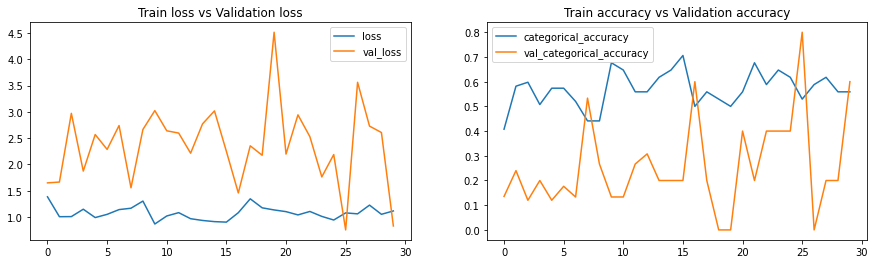

Max. Training Accuracy 0.7058823704719543
Max. Validaiton Accuracy 0.800000011920929


In [110]:
plotModelHistory(model5_history)

### Model 3.1: Conv2D + LSTM, with elu

In [112]:
n_frames = 20
num_epochs = 30
batch_size = 32

img_tensor = getImgTensor(n_frames)
train_generator = generator(train_path, train_doc, batch_size, img_tensor)
val_generator = generator(val_path, val_doc, batch_size, img_tensor)

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
inputShape = (len(img_tensor[0]), img_tensor[1], img_tensor[2], img_tensor[3])

model6 = Sequential([
    TimeDistributed(Conv2D(16, make2dFilter(3), padding='same', activation='elu'), input_shape=inputShape),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(make2dFilter(2))),

    TimeDistributed(Conv2D(32, make2dFilter(3), padding='same', activation='elu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(make2dFilter(2))),

    TimeDistributed(Conv2D(64, make2dFilter(3), padding='same', activation='elu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(make2dFilter(2))),

    TimeDistributed(Conv2D(128, make2dFilter(3), padding='same', activation='elu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(make2dFilter(2))),

    TimeDistributed(Conv2D(256, make2dFilter(3), padding='same', activation='elu')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(make2dFilter(2))),

    TimeDistributed(Flatten()),
    LSTM(256),
    Dropout(0.2),

    Dense(256, activation='elu'),
    Dropout(0.2),

    Dense(5, activation='softmax')
], name="conv_2d_lstm")
model6.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model6.summary())

model6_history = model6.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
            callbacks=callbacks_list, validation_data=val_generator, 
            validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Model: "conv_2d_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_48 (TimeDi  (None, 20, 100, 100, 16)  448      
 stributed)                                                      
                                                                 
 time_distributed_49 (TimeDi  (None, 20, 100, 100, 16)  64       
 stributed)                                                      
                                                                 
 time_distributed_50 (TimeDi  (None, 20, 50, 50, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_51 (TimeDi  (None, 20, 50, 50, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_52 (TimeDi  (None, 20, 50, 50, 32)  

17/17 [==============================] - 92s 6s/step - loss: 1.2502 - categorical_accuracy: 0.4869 - val_loss: 2.1156 - val_categorical_accuracy: 0.3600 - lr: 0.0010
Epoch 3/30
17/17 [==============================] - 78s 5s/step - loss: 1.0692 - categorical_accuracy: 0.5430 - val_loss: 1.6750 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 4/30
15/17 [=========================>....] - ETA: 4s - loss: 1.2937 - categorical_accuracy: 0.5167WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 51s 3s/step - loss: 1.2889 - categorical_accuracy: 0.5074 - val_loss: 2.5796 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 5/30
17/17 [==============================] - 55s 3s/step - loss: 1.1182 - categorical_accuracy: 0.5882 - val_loss: 2.5204 - val_categorical_accuracy: 0.2800 - lr: 0.0010
Epoch 6/30
17/17 [==============================] - ETA: 0s - loss: 1.2555 - categorical_accuracy: 0.4412
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
17/17 [==============================] - 47s 3s/step - loss: 1.2555 - categorical_accuracy: 0.4412 - val_loss: 2.7329 - val_categorical_accuracy: 0.1176 - lr: 0.0010
Epoch 7/30
 9/17 [==============>...............] - ETA: 18s - loss: 0.9816 - categorical_accuracy: 0.6389WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 32s 2s/step - loss: 1.0066 - categorical_accuracy: 0.6300 - val_loss: 3.1555 - val_categorical_accuracy: 0.1333 - lr: 1.0000e-04
Epoch 8/30
17/17 [==============================] - 15s 891ms/step - loss: 0.9673 - categorical_accuracy: 0.6765 - val_loss: 2.3189 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 9/30
17/17 [==============================] - ETA: 0s - loss: 1.1205 - categorical_accuracy: 0.5294
Epoch 00009: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
17/17 [==============================] - 15s 937ms/step - loss: 1.1205 - categorical_accuracy: 0.5294 - val_loss: 2.3586 - val_categorical_accuracy: 0.2667 - lr: 1.0000e-04
Epoch 10/30
 3/17 [====>.........................] - ETA: 5s - loss: 1.5871 - categorical_accuracy: 0.5000WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 16s 992ms/step - loss: 1.1148 - categorical_accuracy: 0.6176 - val_loss: 2.8035 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-05
Epoch 11/30
17/17 [==============================] - 15s 909ms/step - loss: 1.1379 - categorical_accuracy: 0.5882 - val_loss: 2.5704 - val_categorical_accuracy: 0.2667 - lr: 1.0000e-05
Epoch 12/30
15/17 [=========================>....] - ETA: 1s - loss: 1.1725 - categorical_accuracy: 0.6333WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - ETA: 0s - loss: 1.1643 - categorical_accuracy: 0.5882
Epoch 00012: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
17/17 [==============================] - 15s 897ms/step - loss: 1.1643 - categorical_accuracy: 0.5882 - val_loss: 2.3475 - val_categorical_accuracy: 0.3333 - lr: 1.0000e-05
Epoch 13/30
17/17 [==============================] - 17s 1s/step - loss: 1.1530 - categorical_accuracy: 0.4706 - val_loss: 2.0862 - val_categorical_accuracy: 0.2308 - lr: 1.0000e-06
Epoch 14/30
17/17 [==============================] - 13s 770ms/step - loss: 1.0880 - categorical_accuracy: 0.6471 - val_loss: 3.2150 - val_categorical_accuracy: 0.0000e+00 - lr: 1.0000e-06
Epoch 15/30
 9/17 [==============>...............] - ETA: 5s - loss: 1.2077 - categorical_accuracy: 0.5000WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - ETA: 0s - loss: 1.2083 - categorical_accuracy: 0.5000
Epoch 00015: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
17/17 [==============================] - 11s 660ms/step - loss: 1.2083 - categorical_accuracy: 0.5000 - val_loss: 3.7893 - val_categorical_accuracy: 0.0000e+00 - lr: 1.0000e-06
Epoch 16/30
17/17 [==============================] - 12s 736ms/step - loss: 1.0172 - categorical_accuracy: 0.5882 - val_loss: 1.9640 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-07
Epoch 17/30
17/17 [==============================] - 11s 657ms/step - loss: 0.9823 - categorical_accuracy: 0.5882 - val_loss: 1.7446 - val_categorical_accuracy: 0.6000 - lr: 1.0000e-07
Epoch 18/30
 3/17 [====>.........................] - ETA: 8s - loss: 0.4979 - categorical_accuracy: 0.8333 WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - ETA: 0s - loss: 0.9809 - categorical_accuracy: 0.6176
Epoch 00018: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
17/17 [==============================] - 10s 592ms/step - loss: 0.9809 - categorical_accuracy: 0.6176 - val_loss: 2.2337 - val_categorical_accuracy: 0.0000e+00 - lr: 1.0000e-07
Epoch 19/30
17/17 [==============================] - 12s 723ms/step - loss: 1.2763 - categorical_accuracy: 0.5588 - val_loss: 2.1166 - val_categorical_accuracy: 0.6000 - lr: 1.0000e-08
Epoch 20/30
14/17 [=======================>......] - ETA: 1s - loss: 1.3085 - categorical_accuracy: 0.3571WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 13s 769ms/step - loss: 1.3337 - categorical_accuracy: 0.3824 - val_loss: 2.9074 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-08
Epoch 21/30
17/17 [==============================] - ETA: 0s - loss: 1.1933 - categorical_accuracy: 0.5588
Epoch 00021: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
17/17 [==============================] - 12s 740ms/step - loss: 1.1933 - categorical_accuracy: 0.5588 - val_loss: 2.8864 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-08
Epoch 22/30
17/17 [==============================] - 12s 714ms/step - loss: 1.3983 - categorical_accuracy: 0.3824 - val_loss: 2.2002 - val_categorical_accuracy: 0.6000 - lr: 1.0000e-09
Epoch 23/30
 8/17 [=============>................] - ETA: 5s - loss: 0.8077 - categorical_accuracy: 0.7500WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 12s 733ms/step - loss: 0.9319 - categorical_accuracy: 0.6471 - val_loss: 3.1563 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-09
Epoch 24/30
17/17 [==============================] - ETA: 0s - loss: 0.9497 - categorical_accuracy: 0.7353
Epoch 00024: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.
17/17 [==============================] - 13s 809ms/step - loss: 0.9497 - categorical_accuracy: 0.7353 - val_loss: 2.4484 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-09
Epoch 25/30
17/17 [==============================] - 12s 753ms/step - loss: 1.3109 - categorical_accuracy: 0.3529 - val_loss: 1.7058 - val_categorical_accuracy: 0.6000 - lr: 1.0000e-10
Epoch 26/30
 2/17 [==>...........................] - ETA: 10s - loss: 0.9494 - categorical_accuracy: 0.5000WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 13s 816ms/step - loss: 1.4012 - categorical_accuracy: 0.3235 - val_loss: 2.6205 - val_categorical_accuracy: 0.2000 - lr: 1.0000e-10
Epoch 27/30
17/17 [==============================] - 11s 688ms/step - loss: 1.0415 - categorical_accuracy: 0.6176 - val_loss: 1.6039 - val_categorical_accuracy: 0.6000 - lr: 1.0000e-10
Epoch 28/30
14/17 [=======================>......] - ETA: 1s - loss: 1.0772 - categorical_accuracy: 0.6429WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 12s 737ms/step - loss: 1.0024 - categorical_accuracy: 0.6471 - val_loss: 2.4998 - val_categorical_accuracy: 0.0000e+00 - lr: 1.0000e-10
Epoch 29/30
17/17 [==============================] - 13s 784ms/step - loss: 0.9779 - categorical_accuracy: 0.6471 - val_loss: 0.8711 - val_categorical_accuracy: 0.8000 - lr: 1.0000e-10
Epoch 30/30
17/17 [==============================] - 12s 745ms/step - loss: 1.1578 - categorical_accuracy: 0.6765 - val_loss: 1.9670 - val_categorical_accuracy: 0.4000 - lr: 1.0000e-10


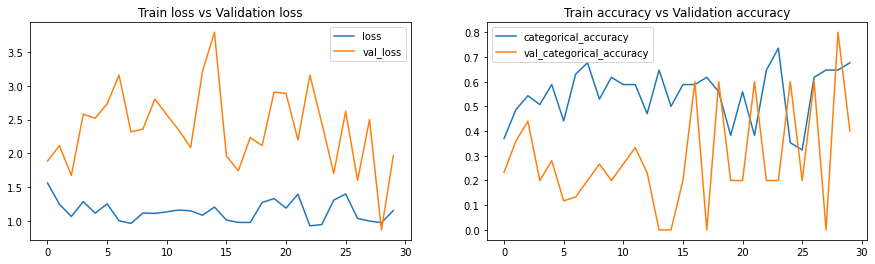

Max. Training Accuracy 0.7352941036224365
Max. Validaiton Accuracy 0.800000011920929


In [113]:
plotModelHistory(model6_history)

### Model 4.0: Transfer Learning (MobileNet) with LSTM, relu

In [ ]:
from tensorflow.keras.applications import mobilenet

In [ ]:
mobilenet = mobilenet.MobileNet(weights='imagenet', include_top=False)

n_frames = 20
num_epochs = 20
batch_size = 64

img_tensor = getImgTensor(n_frames)
train_generator = generator(train_path, train_doc, batch_size, img_tensor)
val_generator = generator(val_path, val_doc, batch_size, img_tensor)

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
inputShape = (len(img_tensor[0]), img_tensor[1], img_tensor[2], img_tensor[3])

model7 = Sequential([
    TimeDistributed(mobilenet, input_shape=inputShape)
], name="mobilenet_lstm")

for layer in model7.layers:
    layer.trainable = False

model7.add(TimeDistributed(BatchNormalization()))
model7.add(TimeDistributed(MaxPooling2D(make2dFilter(2))))
model7.add(TimeDistributed(Flatten()))

model7.add(LSTM(256))
model7.add(Dropout(0.2))

model7.add(Dense(256,activation='relu'))
model7.add(Dropout(0.2))

model7.add(Dense(5, activation='softmax'))

model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model7.summary())

model7_history = model7.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
            callbacks=callbacks_list, validation_data=val_generator, 
            validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
plotModelHistory(model7_history)

### Model 4.1: Transfer Learning (MobileNet) with LSTM, elu

In [ ]:
mobilenet = mobilenet.MobileNet(weights='imagenet', include_top=False)

n_frames = 20
num_epochs = 20
batch_size = 64

img_tensor = getImgTensor(n_frames)
train_generator = generator(train_path, train_doc, batch_size, img_tensor)
val_generator = generator(val_path, val_doc, batch_size, img_tensor)

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
inputShape = (len(img_tensor[0]), img_tensor[1], img_tensor[2], img_tensor[3])

model8 = Sequential([
    TimeDistributed(mobilenet, input_shape=inputShape)
], name="mobilenet_lstm")

for layer in model8.layers:
    layer.trainable = False

model8.add(TimeDistributed(BatchNormalization()))
model8.add(TimeDistributed(MaxPooling2D(make2dFilter(2))))
model8.add(TimeDistributed(Flatten()))

model8.add(LSTM(256))
model8.add(Dropout(0.2))

model8.add(Dense(256,activation='elu'))
model8.add(Dropout(0.2))

model8.add(Dense(5, activation='softmax'))

model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model8.summary())

model8_history = model8.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
            callbacks=callbacks_list, validation_data=val_generator, 
            validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
plotModelHistory(model8_history)

## Model Prediction _ Best Model

@jiayu and Andrew need to test the best model, with accuracy metrics + confusion matrix